<a href="https://colab.research.google.com/github/frederickqi/Flask-request-params/blob/master/BigQuery_bquxjob_33bab0e9_187a0e23956.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @title Setup
from google.colab import auth
from google.cloud import bigquery
from google.colab import data_table

project = 'da-edw-analytics-stg-mscdirect' # Project ID inserted based on the query results selected to explore
location = 'us-east4' # Location inserted based on the query results selected to explore
client = bigquery.Client(project=project, location=location)
data_table.enable_dataframe_formatter()
auth.authenticate_user()

## Reference SQL syntax from the original job
Use the ```jobs.query```
[method](https://cloud.google.com/bigquery/docs/reference/rest/v2/jobs/query) to
return the SQL syntax from the job. This can be copied from the output cell
below to edit the query now or in the future. Alternatively, you can use
[this link](https://console.cloud.google.com/bigquery?j=da-edw-analytics-stg-mscdirect:us-east4:bquxjob_33bab0e9_187a0e23956)
back to BigQuery to edit the query within the BigQuery user interface.

In [48]:
# Running this code will display the query used to generate your previous job

job = client.get_job('bquxjob_33bab0e9_187a0e23956') # Job ID inserted based on the query results selected to explore
print(job.query)


SELECT * FROM `da-edw-analytics-stg-mscdirect.Cornell_Student_Project.ML_User_Metric` 


# Result set loaded from BigQuery job as a DataFrame
Query results are referenced from the Job ID ran from BigQuery and the query
does not need to be re-run to explore results. The ```to_dataframe```
[method](https://googleapis.dev/python/bigquery/latest/generated/google.cloud.bigquery.job.QueryJob.html#google.cloud.bigquery.job.QueryJob.to_dataframe)
downloads the results to a Pandas DataFrame by using the BigQuery Storage API.

To edit query syntax, you can do so from the BigQuery SQL editor or in the
```Optional:``` sections below.

In [81]:
# Running this code will read results from your previous job
from google.cloud import bigquery

import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers

import matplotlib.pyplot as plt

# Import data from our BigQuery workspace
job = client.get_job('bquxjob_33bab0e9_187a0e23956')
results = job.to_dataframe()
results

# Define the columns to be used as input for PCA
columns = ["Fastenal_PriceDiffPct", "Grainger_PriceDiffPct", "Zoro_PriceDiffPct", "Revenue", "Visits", "UniqueVisitors", 
"AvgTimeSpentPerVisitor","CartAbandonmentRate","CartAdditions", "Orders", "ConversionRate", "BounceRate"]

# Define the number of principal components to compute
n_components = 4

# Define the table reference to query the input data
table_ref = "da-edw-analytics-stg-mscdirect.Cornell_Student_Project.ML_User_Metric"

# Define the SQL query to select the input data
sql = f"""
    SELECT {", ".join(columns)}
    FROM `{table_ref}`
"""

# Query the data and load it into a pandas dataframe
df = client.query(sql).to_dataframe()

# Drop rows with missing values
df = df.dropna()

# # Convert "taxonomy2" and "taxonomy" to integer labels
# encoder = LabelEncoder()
# df["taxonomy1"] = encoder.fit_transform(df["taxonomy1"])
# df["taxonomy2"] = encoder.fit_transform(df["taxonomy2"])

# Store the df for later deep learning model
df_dl = df

# Perform the PCA analysis using scikit-learn
pca = PCA(n_components=n_components)
pca.fit(df[columns])

# Get the principal components and their explained variance
principal_components = pca.components_
explained_variance = pca.explained_variance_ratio_

# Print the results
print("Principal components:")
print(principal_components)
print("Explained variance:")
print(explained_variance)


Principal components:
[[-3.39050389e-06 -5.74354647e-06  3.49718405e-07  8.42567453e-01
   4.27267250e-01  3.27111093e-01  5.60318352e-05  1.49201081e-07
   2.25845444e-02  3.32457835e-03  7.69474976e-08 -2.98718182e-07]
 [ 6.37564228e-06  1.01197272e-05 -4.59123281e-07  5.37495087e-01
  -6.30767628e-01 -5.59429956e-01  1.06087953e-06 -4.57858814e-06
  -1.63627144e-02 -1.27173140e-03  1.90327501e-07 -6.61244123e-06]
 [-7.50640939e-05 -2.19022886e-06  3.36766980e-05 -3.42786750e-02
   6.21715160e-01 -7.41269615e-01  1.28786971e-03  9.02943192e-06
   2.48277215e-01  3.42246822e-02  1.96927720e-06 -1.41101062e-04]
 [-1.42598271e-04 -9.96923471e-05  4.37971268e-04  1.88710797e-03
   1.81769235e-01 -1.74773703e-01 -1.06454861e-03 -1.93401796e-05
  -9.60525052e-01 -1.17476830e-01 -1.47998550e-05 -1.31525412e-06]]
Explained variance:
[9.22953796e-01 7.61278961e-02 8.59387186e-04 5.81590150e-05]


## Show descriptive statistics using describe()
Use the ```pandas DataFrame.describe()```
[method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)
to generate descriptive statistics. Descriptive statistics include those that
summarize the central tendency, dispersion and shape of a dataset’s
distribution, excluding ```NaN``` values. You may also use other Python methods
to interact with your data.

Epoch 1/200
53/53 [==============================] - 1s 6ms/step - loss: 104300760.0000 - val_loss: 132068720.0000
Epoch 2/200
53/53 [==============================] - 0s 3ms/step - loss: 104260336.0000 - val_loss: 131998680.0000
Epoch 3/200
53/53 [==============================] - 0s 3ms/step - loss: 104183608.0000 - val_loss: 131871128.0000
Epoch 4/200
53/53 [==============================] - 0s 3ms/step - loss: 104056360.0000 - val_loss: 131677952.0000
Epoch 5/200
53/53 [==============================] - 0s 3ms/step - loss: 103894752.0000 - val_loss: 131423248.0000
Epoch 6/200
53/53 [==============================] - 0s 3ms/step - loss: 103640896.0000 - val_loss: 131067064.0000
Epoch 7/200
53/53 [==============================] - 0s 3ms/step - loss: 103339384.0000 - val_loss: 130578728.0000
Epoch 8/200
53/53 [==============================] - 0s 3ms/step - loss: 102885288.0000 - val_loss: 129989032.0000
Epoch 9/200
53/53 [==============================] - 0s 3ms/step - loss: 1024275

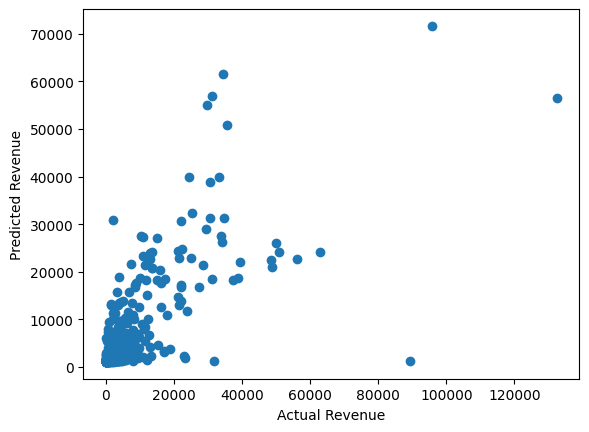

In [55]:
#  fully connected neural network with two hidden layers begins

# Separate the input (X) and output (y) variables
X = df_dl[["Fastenal_PriceDiffPct", "Grainger_PriceDiffPct", "Zoro_PriceDiffPct", "Visits", "UniqueVisitors"]]
y = df_dl["Revenue"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the input data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the model architecture
model = Sequential()

#Here can change 64 to add more layers
model.add(Dense(64, input_shape=(5,), activation="relu",kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(16, activation="relu"))
model.add(Dense(1, activation="linear"))

# Compile the model
model.compile(loss="mean_squared_error", optimizer="RMSprop")

# Train the model
model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.2)

# Evaluate the model on the testing set
test_loss = model.evaluate(X_test, y_test)

# Generate predictions on the testing set
y_pred = model.predict(X_test)

# Calculate additional metrics
mse = np.mean(np.square(y_pred.ravel()- y_test.ravel()))
mae = mean_absolute_error(y_test.ravel(), y_pred.ravel())
rmse = np.sqrt(mse)
r_squared = 1 - (np.sum(np.square(y_test.ravel() - y_pred.ravel())) / np.sum(np.square(y_test.ravel() - np.mean(y_test))))

print('Loss: %.4f' % test_loss)
print('MAE: %.4f' % mae)
print('MSE: %.4f' % mse)
print('RMSE: %.4f' % rmse)
print('R-squared: %.4f' % r_squared)

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Revenue")
plt.ylabel("Predicted Revenue")
plt.show()

Visits            Int64
UniqueVisitors    Int64
dtype: object
Epoch 1/200
53/53 [==============================] - 4s 12ms/step - loss: 128396096.0000 - val_loss: 112981168.0000
Epoch 2/200
53/53 [==============================] - 0s 6ms/step - loss: 128375400.0000 - val_loss: 112950904.0000
Epoch 3/200
53/53 [==============================] - 0s 6ms/step - loss: 128291848.0000 - val_loss: 112852168.0000
Epoch 4/200
53/53 [==============================] - 0s 6ms/step - loss: 128077408.0000 - val_loss: 112631008.0000
Epoch 5/200
53/53 [==============================] - 0s 6ms/step - loss: 127641368.0000 - val_loss: 112245856.0000
Epoch 6/200
53/53 [==============================] - 0s 7ms/step - loss: 127017056.0000 - val_loss: 111584536.0000
Epoch 7/200
53/53 [==============================] - 0s 6ms/step - loss: 126027520.0000 - val_loss: 110676304.0000
Epoch 8/200
53/53 [==============================] - 0s 7ms/step - loss: 124650872.0000 - val_loss: 109349632.0000
Epoch 9/200
53/53

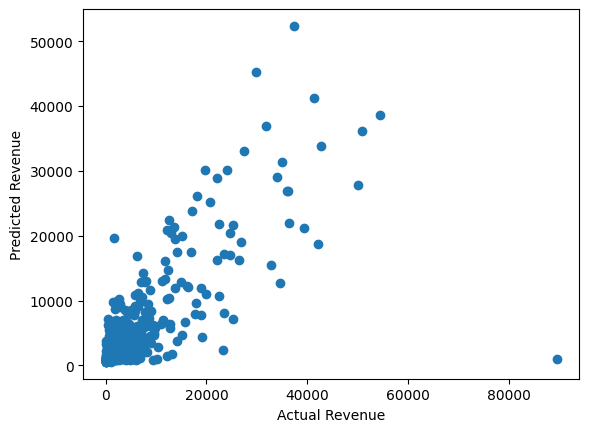

In [79]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



# Separate the input (X) and output (y) variables
X = df[["Visits", "UniqueVisitors"]]
y = df["Revenue"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print data types of the input columns
print(X.dtypes)

# Scale the input data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape the input data for LSTM
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Define the model architecture
model = Sequential()
model.add(LSTM(128, input_shape=(1, 2), activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(loss="mean_squared_error", optimizer="adam")

# Train the model
model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.2)

# Evaluate the model on the testing set
test_loss = model.evaluate(X_test, y_test)

# Generate predictions on the testing set
y_pred = model.predict(X_test)

# Calculate additional metrics
mse = np.mean(np.square(y_pred.ravel()- y_test.ravel()))
mae = mean_absolute_error(y_test.ravel(), y_pred.ravel())
rmse = np.sqrt(mse)
r_squared = 1 - (np.sum(np.square(y_test.ravel() - y_pred.ravel())) / np.sum(np.square(y_test.ravel() - np.mean(y_test))))

print('Loss: %.4f' % test_loss)
print('MAE: %.4f' % mae)
print('MSE: %.4f' % mse)
print('RMSE: %.4f' % rmse)
print('R-squared: %.4f' % r_squared)

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Revenue")
plt.ylabel("Predicted Revenue")
plt.show()


In [ ]:
results.describe()